In [ ]:
#Necesito mi data en un solo mapa: 

In [1]:
import geopandas as gpd
import pandas as pd
import os
from  fiona import listlayers
import os
mapa_Ucrania='maps/ukraineMaps.gpkg'
listlayers(mapa_Ucrania)


['country', 'cities', 'rivers', 'municipalities']

In [2]:
cities = gpd.read_file(mapa_Ucrania, layer='cities')
rivers = gpd.read_file(mapa_Ucrania, layer='rivers')
ukraine = gpd.read_file(mapa_Ucrania, layer='country')
ukraine.to_file(os.path.join("maps","ukraineMaps.gpkg"), layer='country', driver="GPKG")
cities.to_file(os.path.join("maps","ukraineMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","ukraineMaps.gpkg"), layer='rivers', driver="GPKG")

In [3]:
# consiguiendo states y municipalities:
states = gpd.read_file(os.path.join("maps", "ukr_admbnda_sspe_20230201_shp", "ukr_admbnda_adm1_sspe_20230201.shp"))
municipalities = gpd.read_file(os.path.join("maps", "ukr_admbnda_sspe_20230201_shp", "ukr_admbnda_adm2_sspe_20230201.shp"))

In [4]:
#agregarlos al mapa:

municipalities.to_file(os.path.join("maps","ukraineMaps.gpkg"), layer='municipalities', driver="GPKG")
import geopandas as gpd
import os

# Ruta al archivo .shp
ruta_archivo_shp = os.path.join("maps", "ukr_admbnda_sspe_20230201_shp", "ukr_admbnda_adm2_sspe_20230201.shp")

# Lee el archivo .shp en un GeoDataFrame
municipalities = gpd.read_file(ruta_archivo_shp)

In [5]:
listlayers(mapa_Ucrania)


['country', 'cities', 'rivers', 'municipalities']

In [6]:
# ahora de los aeropuertos:
airports = pd.read_csv(os.path.join("data", "ua-airports.csv"))

In [7]:
airports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,6467,UKBB,large_airport,Boryspil International Airport,50.345001,30.894699,427,EU,Ukraine,UA,...,Boryspil,1,UKBB,KBP,NaN,https://kbp.aero/en/,https://en.wikipedia.org/wiki/Boryspil_Interna...,"Borispol, Міжнародний аеропорт ""Бориспіль"", Kyiv",1600,2022-11-20T09:05:31+00:00
2,6478,UKKK,medium_airport,Ihor Sikorsky Kyiv International Airport (Zhul...,50.40194,30.45194,587,EU,Ukraine,UA,...,Kyiv,1,UKKK,IEV,NaN,https://iev.aero/,https://en.wikipedia.org/wiki/Kyiv_Internation...,"Міжнародний аеропорт ""Київ"", Kiev",750,2022-11-20T09:02:37+00:00
3,6487,UKOO,medium_airport,Odessa International Airport,46.4268,30.6765,172,EU,Ukraine,UA,...,Odessa,1,UKOO,ODS,NaN,http://www.airport.od.ua/,https://en.wikipedia.org/wiki/Odessa_Internati...,"Odesa Central, Міжнародний аеропорт Одеса",750,2021-11-20T16:17:31+00:00
4,6481,UKLL,large_airport,Lviv International Airport,49.8125,23.9561,1071,EU,Ukraine,UA,...,Lviv,1,UKLL,LWO,NaN,http://www.airport.lviv.ua/index.php?id=home&L=1,https://en.wikipedia.org/wiki/Lviv_Internation...,"Міжнародний аеропорт ""Львів""",1200,2021-08-01T05:06:08+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,342226,UA-0158,heliport,Oreanda Heliport,44.4513,34.1293,479,EU,Ukraine,UA,...,Yalta,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-03-19T16:30:05+00:00
249,342227,UA-0159,heliport,Pension Wisteria Helipad,44.461824,34.145346,125,EU,Ukraine,UA,...,Yalta,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-03-19T16:31:37+00:00
250,342228,UA-0160,heliport,Massandra Palace Heliport,44.5145,34.2039,971,EU,Ukraine,UA,...,Yalta,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-03-19T16:36:03+00:00
251,342229,UA-0161,heliport,Artek Heliport,44.56059,34.307563,335,EU,Ukraine,UA,...,Yalta,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-03-19T16:44:30+00:00


In [8]:
# limpiamos data
airports.drop(index=0,inplace=True)
airports.reset_index(drop=True, inplace=True)

# mantenemos las columnas que necesitamos
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
airports=airports.loc[:,keep]
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           252 non-null    object
 1   type           252 non-null    object
 2   latitude_deg   252 non-null    object
 3   longitude_deg  252 non-null    object
 4   elevation_ft   132 non-null    object
 5   region_name    252 non-null    object
 6   municipality   228 non-null    object
dtypes: object(7)
memory usage: 13.9+ KB


In [9]:
airports

,name,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality
0,Boryspil International Airport,large_airport,50.345001,30.894699,427,Kyiv Oblast,Boryspil
1,Ihor Sikorsky Kyiv International Airport (Zhul...,medium_airport,50.40194,30.45194,587,Kyiv (city),Kyiv
2,Odessa International Airport,medium_airport,46.4268,30.6765,172,Odessa Oblast,Odessa
3,Lviv International Airport,large_airport,49.8125,23.9561,1071,Lviv Oblast,Lviv
4,Simferopol International Airport,medium_airport,45.0522,33.975101,639,Crimea (Autonomous Republic),Simferopol
...,...,...,...,...,...,...,...
247,Oreanda Heliport,heliport,44.4513,34.1293,479,Crimea (Autonomous Republic),Yalta
248,Pension Wisteria Helipad,heliport,44.461824,34.145346,125,Crimea (Autonomous Republic),Yalta
249,Massandra Palace Heliport,heliport,44.5145,34.2039,971,Crimea (Autonomous Republic),Yalta
250,Artek Heliport,heliport,44.56059,34.307563,335,Crimea (Autonomous Republic),Yalta


In [10]:
# convertimos
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
airports[numericCols]=airports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# verificamos
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           252 non-null    object 
 1   type           252 non-null    object 
 2   latitude_deg   252 non-null    float64
 3   longitude_deg  252 non-null    float64
 4   elevation_ft   132 non-null    float64
 5   region_name    252 non-null    object 
 6   municipality   228 non-null    object 
dtypes: float64(3), object(4)
memory usage: 13.9+ KB


In [11]:
# CONVIRTIÉNDOLO EN DATA ESPACIAL:
# CUANDO YA ESTÁ PROYECTADO NO SE HABLA DE LONGITUD Y LATITUD
aeropuertos=gpd.GeoDataFrame(data=airports.copy(),
                 geometry=gpd.points_from_xy(airports.longitude_deg,
                                             airports.latitude_deg), 
                 crs=4326)

In [12]:
aeropuertos=aeropuertos.to_crs(5641)

#PROYECTÁNDOLO

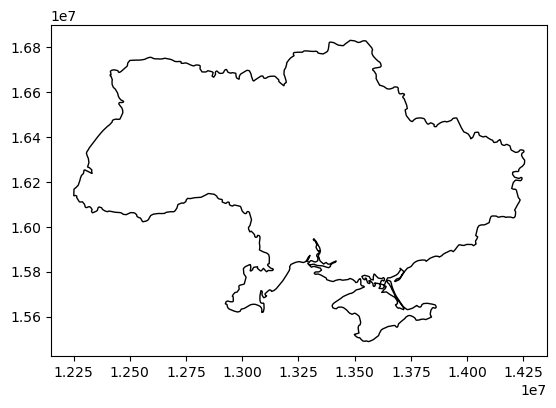

In [13]:
ukraine = gpd.read_file(mapa_Ucrania, layer='country')

base = ukraine.plot(color='white', edgecolor='black')


In [14]:
# puertos, datos marítimos:

portsFile=os.path.join('data','UpdatedPub150.csv')

info_mar=pd.read_csv(portsFile)

info_mar.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [15]:
#reemplazamos:
info_mar.rename(columns={'Main Port Name':'portName'},inplace=True)
info_mar=info_mar.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

In [16]:
info_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


<Axes: >

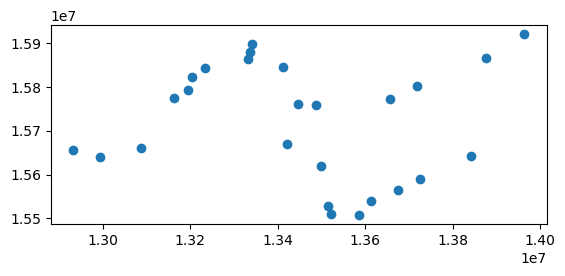

In [17]:
mar=gpd.GeoDataFrame(data=info_mar.copy(),
                 geometry=gpd.points_from_xy(info_mar.Longitude,
                                             info_mar.Latitude), 
                 crs=4326)

mar_ua=mar[mar['Country Code']=='Ukraine'].copy()

# RESETEA INDICES
mar_ua.reset_index(drop=True, inplace=True)

# REPROYECTANDO
mar_ua=mar_ua.to_crs(5641)
mar_ua.plot()

<Axes: >

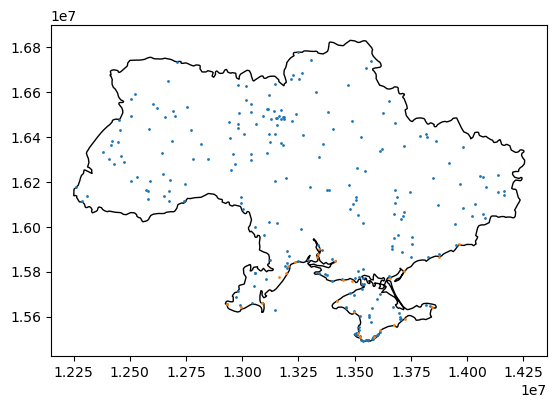

In [18]:
# PLOTEAR EVIDENCIA DE MAR Y AVION EN MAPA INICIAL
base = ukraine.plot(color='white', edgecolor='black')
aeropuertos.plot(ax=base,markersize=1)
mar_ua.plot(ax=base,markersize=1)

<Axes: >

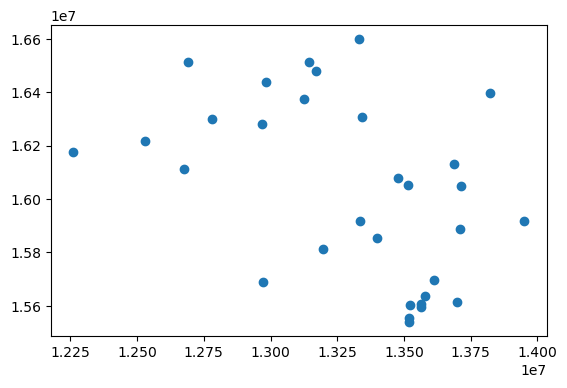

In [19]:
# REDUCIR A AEROPUERTOS medianos
mediumAirports= aeropuertos[aeropuertos['type'] == "medium_airport"]
mediumAirports.plot()


<Axes: >

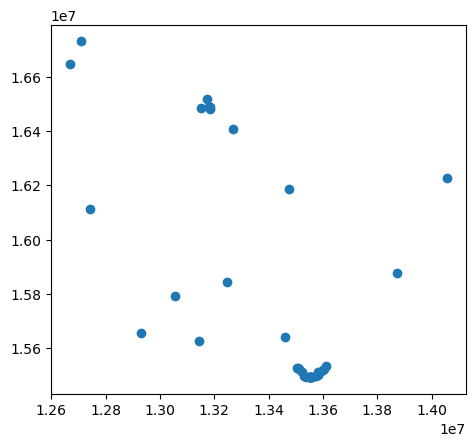

In [20]:
heliport=aeropuertos[aeropuertos['type'] == "heliport"]
heliport.plot()

In [21]:

# conversion
border=ukraine.boundary.to_frame() 

# new column (optional)
border['name']='Ukraine' 

# renaming the geometry column
border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
border = border.set_geometry("geometry")

In [22]:
ukraine.to_file(os.path.join("maps","ukraineMaps_all.gpkg"),layer='country', driver="GPKG")
cities.to_file(os.path.join("maps","ukraineMaps_all.gpkg"),layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","ukraineMaps_all.gpkg"),layer='rivers', driver="GPKG")
mediumAirports.to_file(os.path.join("maps","ukraineMaps_all.gpkg"),layer='mediumAirports', driver="GPKG")
border.to_file(os.path.join("maps","ukraineMaps_all.gpkg"), layer='border', driver="GPKG")
municipalities.to_file(os.path.join("maps", "ukraineMaps_all.gpkg"), layer='municipalities', driver="GPKG")
states.to_file(os.path.join("maps", "ukraineMaps_all.gpkg"), layer='states', driver="GPKG")
mar_ua.to_file(os.path.join("maps","ukraineMaps_all.gpkg"), layer='seaports', driver="GPKG")
heliport.to_file(os.path.join("maps","ukraineMaps_all.gpkg"),layer='heliport', driver="GPKG")

In [23]:
# REVISAR LAYERS

mapa_layer_final='maps/ukraineMaps_all.gpkg'


listlayers(mapa_layer_final)

['airports',
 'roads',
 'country',
 'cities',
 'rivers',
 'mediumAirports',
 'border',
 'municipalities',
 'states',
 'seaports',
 'heliport']

In [24]:
################################################################

In [25]:
# PARTE 2

In [53]:
peruData= pd.read_excel(os.path.join("data", "geodir-ubigeo-inei.xlsx"))

In [54]:
peruData

,Ubigeo,Distrito,Provincia,Departamento,Poblacion,Superficie,Y,X,Sí tiene servicio de agua todos los días de la semana,No tiene servicio de agua todos los días de la semana,Sí tiene cocina a gas,No tiene cocina a gas,No está afiliado al SIS,"Sí, afiliado al SIS"
0,10101,Chachapoyas,Chachapoyas,Amazonas,29171,153.78,-6.2294,-77.8714,6307,398,7662,697,17435,15154
1,10102,Asuncion,Chachapoyas,Amazonas,288,25.71,-6.0317,-77.7122,84,15,23,81,44,218
2,10103,Balsas,Chachapoyas,Amazonas,1644,357.09,-6.8375,-78.0214,194,39,127,228,318,818
3,10104,Cheto,Chachapoyas,Amazonas,591,56.97,-6.2558,-77.7003,186,0,139,81,101,541
4,10105,Chiliquin,Chachapoyas,Amazonas,687,143.43,-6.0778,-77.7392,155,8,126,80,60,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,Irazola,Padre Abad,Ucayali,10830,998.93,-8.8289,-75.2139,694,978,1615,948,3095,7119
1870,250303,Curimana,Padre Abad,Ucayali,8956,2134.04,-8.4353,-75.1597,526,105,1100,784,3187,4535
1871,250304,Neshuya,Padre Abad,Ucayali,8445,579.51,-8.6392,-74.9644,1439,92,1404,521,2573,5021
1872,250305,Alexander von Humboldt,Padre Abad,Ucayali,6678,190.80,-8.8264,-75.0522,1015,67,881,414,2466,2671


In [55]:
peruData.rename(columns={'Sí tiene servicio de agua todos los días de la semana':'servicio_agua_diario'},inplace=True)
peruData.rename(columns={'No tiene servicio de agua todos los días de la semana':'no_servicio_agua_diario'},inplace=True)
peruData.rename(columns={'Sí tiene cocina a gas':'si_gas'},inplace=True)
peruData.rename(columns={'No tiene cocina a gas':'no_gas'},inplace=True)
peruData.rename(columns={'No está afiliado al SIS':'afiliado_SIS'},inplace=True)
peruData.rename(columns={'Sí, afiliado al SIS':'no_afiliado_SIS'},inplace=True)

In [56]:
peruData

,Ubigeo,Distrito,Provincia,Departamento,Poblacion,Superficie,Y,X,servicio_agua_diario,no_servicio_agua_diario,si_gas,no_gas,afiliado_SIS,no_afiliado_SIS
0,10101,Chachapoyas,Chachapoyas,Amazonas,29171,153.78,-6.2294,-77.8714,6307,398,7662,697,17435,15154
1,10102,Asuncion,Chachapoyas,Amazonas,288,25.71,-6.0317,-77.7122,84,15,23,81,44,218
2,10103,Balsas,Chachapoyas,Amazonas,1644,357.09,-6.8375,-78.0214,194,39,127,228,318,818
3,10104,Cheto,Chachapoyas,Amazonas,591,56.97,-6.2558,-77.7003,186,0,139,81,101,541
4,10105,Chiliquin,Chachapoyas,Amazonas,687,143.43,-6.0778,-77.7392,155,8,126,80,60,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,Irazola,Padre Abad,Ucayali,10830,998.93,-8.8289,-75.2139,694,978,1615,948,3095,7119
1870,250303,Curimana,Padre Abad,Ucayali,8956,2134.04,-8.4353,-75.1597,526,105,1100,784,3187,4535
1871,250304,Neshuya,Padre Abad,Ucayali,8445,579.51,-8.6392,-74.9644,1439,92,1404,521,2573,5021
1872,250305,Alexander von Humboldt,Padre Abad,Ucayali,6678,190.80,-8.8264,-75.0522,1015,67,881,414,2466,2671


In [57]:
# mapa provincias

os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

# Ruta al archivo .shp
archivo_shp = "data/PROVINCIAS_inei_geogpsperu.shp"

# Cargar el archivo .shp en un GeoDataFrame
data_shp = gpd.read_file(archivo_shp)

DriverError: Unable to open data/PROVINCIAS_inei_geogpsperu.shx or data/PROVINCIAS_inei_geogpsperu.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.